<h1 align="center">Regression Analysis</h1>
<h3 align="center">Jonesh Shrestha</h3>

**Regression Analysis**: Predicting violent crime rates using multiple regression techniques

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Predicting Community Crime Rates with Regression Analysis

## Project Overview

This project explores multiple linear regression techniques to predict violent crime rates across US communities. The dataset combines 1990 US Census data with 1995 FBI crime statistics, containing 1,994 communities with 97 socioeconomic features.

**Objective**: Predict `ViolentCrimesPerPop` using various regression approaches including standard linear regression, automated feature selection, Ridge/Lasso regularization, and Stochastic Gradient Descent with elastic net.

**Dataset**: Communities and Crime data subset with demographic, economic, education, employment, and housing features.


## 1. Data Loading and Preprocessing

Loading the Communities and Crime dataset, handling missing values, and preparing train-test splits for modeling.


In [3]:
communities_df = pd.read_csv("communities/communities.csv")
communities_df.head(10)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,6,SouthPasadenacity,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,...,0.0,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.14
6,44,Lincolntown,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,...,0.0,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.03
7,6,Selmacity,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,...,0.0,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.55
8,21,Hendersoncity,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,...,0.0,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.53
9,29,Claytoncity,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,...,0.0,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.15


In [4]:
comm_clean_df = communities_df.drop(columns=["state", "communityname"])
comm_clean_df.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.0,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.0,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.0,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.0,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.0,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.15


In [5]:
# setting to display all the rows, to view all attributes (series)
# pd.set_option('display.max_rows', None)

comm_clean_df.isna().sum()[comm_clean_df.isna().sum() > 0]

Series([], dtype: int64)

In [6]:
comm_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 98 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population             1994 non-null   float64
 1   householdsize          1994 non-null   float64
 2   racepctblack           1994 non-null   float64
 3   racePctWhite           1994 non-null   float64
 4   racePctAsian           1994 non-null   float64
 5   racePctHisp            1994 non-null   float64
 6   agePct12t21            1994 non-null   float64
 7   agePct12t29            1994 non-null   float64
 8   agePct16t24            1994 non-null   float64
 9   agePct65up             1994 non-null   float64
 10  numbUrban              1994 non-null   float64
 11  pctUrban               1994 non-null   float64
 12  medIncome              1994 non-null   float64
 13  pctWWage               1994 non-null   float64
 14  pctWFarmSelf           1994 non-null   float64
 15  pctW

In [7]:
# -- OtherPerCap: per capita income for people with 'other' heritage (numeric - decimal) from dataset description
# but it's object type so there is a possible chance of this data having missing values
comm_clean_df["OtherPerCap"].unique()

array(['0.36', '0.22', '0.28', '0.51', '0.48', '0.24', '0.18', '0.29',
       '0.17', '0.34', '0.35', '0.13', '0.33', '0.2', '1', '0.72', '0',
       '0.19', '0.3', '0.38', '0.14', '0.26', '0.64', '0.25', '0.37',
       '0.16', '0.15', '0.76', '0.4', '0.42', '0.23', '0.31', '0.32',
       '0.5', '0.66', '0.21', '0.7', '0.27', '0.11', '0.55', '0.95',
       '0.03', '0.45', '0.08', '0.43', '0.62', '0.02', '0.41', '?',
       '0.39', '0.88', '0.71', '0.44', '0.47', '0.09', '0.53', '0.1',
       '0.46', '0.05', '0.52', '0.75', '0.06', '0.93', '0.12', '0.77',
       '0.69', '0.86', '0.73', '0.67', '0.84', '0.81', '0.54', '0.59',
       '0.01', '0.68', '0.98', '0.04', '0.61', '0.9', '0.57', '0.49',
       '0.56', '0.07', '0.92', '0.6', '0.94', '0.63', '0.87', '0.79',
       '0.99', '0.58', '0.83', '0.85', '0.8', '0.82', '0.74', '0.65',
       '0.89'], dtype=object)

In [8]:
# imputing those '?' values based on variable means
comm_clean_df = comm_clean_df.replace("?", np.nan)
comm_clean_df["OtherPerCap"] = comm_clean_df["OtherPerCap"].astype("float64")
comm_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 98 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population             1994 non-null   float64
 1   householdsize          1994 non-null   float64
 2   racepctblack           1994 non-null   float64
 3   racePctWhite           1994 non-null   float64
 4   racePctAsian           1994 non-null   float64
 5   racePctHisp            1994 non-null   float64
 6   agePct12t21            1994 non-null   float64
 7   agePct12t29            1994 non-null   float64
 8   agePct16t24            1994 non-null   float64
 9   agePct65up             1994 non-null   float64
 10  numbUrban              1994 non-null   float64
 11  pctUrban               1994 non-null   float64
 12  medIncome              1994 non-null   float64
 13  pctWWage               1994 non-null   float64
 14  pctWFarmSelf           1994 non-null   float64
 15  pctW

In [9]:
comm_clean_df.isna().sum()[comm_clean_df.isna().sum() > 0]

OtherPerCap    1
dtype: int64

In [10]:
comm_clean_df["OtherPerCap"] = comm_clean_df["OtherPerCap"].fillna(
    comm_clean_df["OtherPerCap"].mean()
)
comm_clean_df.isna().sum()[comm_clean_df.isna().sum() > 0]

Series([], dtype: int64)

In [11]:
# Compute and display basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set
comm_clean_df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
comm_target_df = comm_clean_df[["ViolentCrimesPerPop"]]
comm_target_df.head(5)

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03


In [13]:
comm_clean_df.drop(columns=["ViolentCrimesPerPop"], inplace=True)
comm_clean_df.head(5)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [14]:
# Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    comm_clean_df, comm_target_df, test_size=0.2, random_state=33
)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1595, 97)
X_test shape: (399, 97)
y_train shape: (1595,)
y_test shape: (399,)


### Data Preprocessing Summary

- Removed identifier columns: `state` and `communityname`
- Detected missing values represented as '?' in `OtherPerCap` column
- Converted to NaN and imputed using column mean
- Created 80-20 train-test split (1,595 training, 399 test samples) with `random_state=33`
- Target variable: `ViolentCrimesPerPop` (normalized between 0-1)


## 2. Baseline: Standard Multiple Linear Regression

Building a baseline model using ordinary least squares regression with all 97 features.


In [15]:
# create a function to measure the perfomance of the model
from sklearn.metrics import root_mean_squared_error


def measure_performance(X, y, model, metric=root_mean_squared_error):
    y_pred = model.predict(X)
    score = metric(y, y_pred)
    return score

In [16]:
# Perform standard multiple linear regression on data using the scikit-learn Linear Regression module
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_train = linreg.predict(X_train)

for i in range(10):
    print(f"Actual Value: {y_train[i]}, Predicted Value: {y_pred_train[i]:.4f}")

Actual Value: 0.08, Predicted Value: -0.0306
Actual Value: 0.4, Predicted Value: 0.6268
Actual Value: 0.02, Predicted Value: -0.0737
Actual Value: 0.18, Predicted Value: 0.1154
Actual Value: 0.07, Predicted Value: 0.0708
Actual Value: 0.33, Predicted Value: 0.4414
Actual Value: 0.56, Predicted Value: 0.7031
Actual Value: 0.15, Predicted Value: 0.1242
Actual Value: 0.22, Predicted Value: 0.2300
Actual Value: 0.76, Predicted Value: 0.4887


In [17]:
# Compute the RMSE values on the full training data (the 80% partition)
train_rmse = measure_performance(X_train, y_train, linreg)

print(f"The RMSE value on the full training data is: {train_rmse}")

The RMSE value on the full training data is: 0.1261959313342669


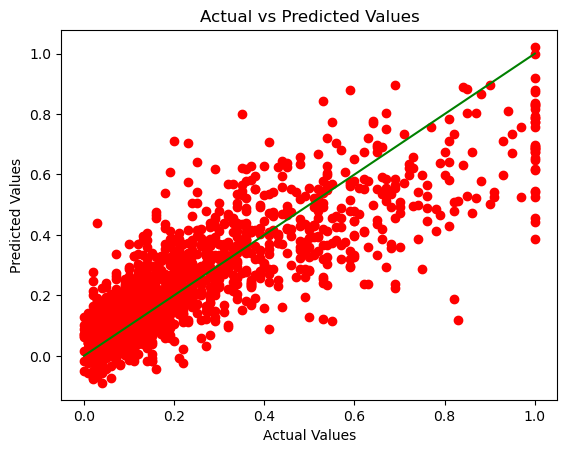

In [18]:
# plot the correlation between the predicted and actual values of the target attribute
plt.scatter(y_train, y_pred_train, c="r")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "g-")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

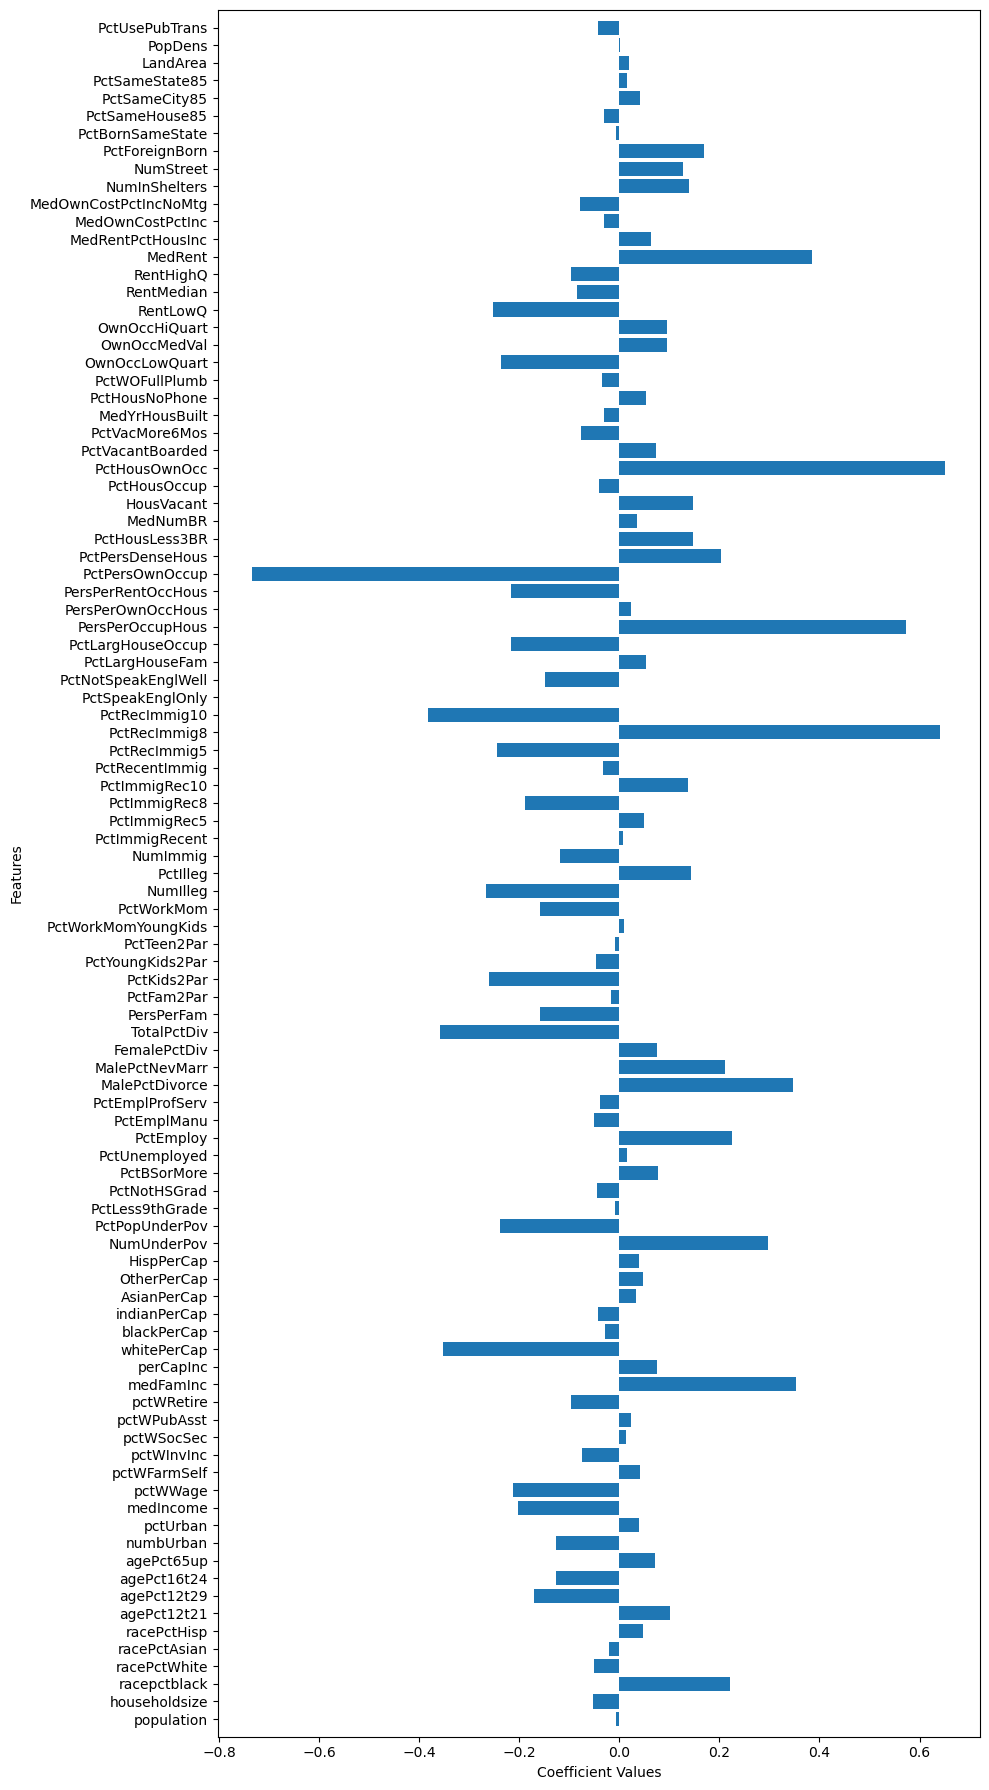

In [19]:
# Display the obtained regression coefficients (weights) and plot them using matplotlib.
categories = comm_clean_df.columns.to_numpy()
weights = (linreg.coef_).flatten()

plt.figure(figsize=(10, 18))
plt.barh(categories, weights)
plt.xlabel("Coefficient Values")
plt.ylabel("Features")
plt.ylim(-1, len(categories))
plt.tight_layout()

In [20]:
# perform 10-fold cross-validation on the training partition
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
curr_fold = 1
total_rmse = []
for train_idx, test_idx in kf.split(X_train):
    linreg.fit(X_train.iloc[train_idx], y_train[train_idx])
    p_rmse = measure_performance(X_train.iloc[test_idx], y_train[test_idx], linreg)

    print(f"Fold {curr_fold}, RMSE: {p_rmse:.4f}")
    total_rmse.append(p_rmse)
    curr_fold += 1

Fold 1, RMSE: 0.1437
Fold 2, RMSE: 0.1385
Fold 3, RMSE: 0.1330
Fold 4, RMSE: 0.1360
Fold 5, RMSE: 0.1351
Fold 6, RMSE: 0.1323
Fold 7, RMSE: 0.1192
Fold 8, RMSE: 0.1216
Fold 9, RMSE: 0.1367
Fold 10, RMSE: 0.1468


In [21]:
print(f"10-fold Cross Validation RMSE: {np.mean(total_rmse):.4f}")
print(f"Training RMSE: {train_rmse:.4f}")

10-fold Cross Validation RMSE: 0.1343
Training RMSE: 0.1262


### Baseline Model Results

- **Training RMSE**: 0.1262
- **10-Fold Cross-Validation RMSE**: 0.1343

The small gap between training and CV RMSE indicates reasonable generalization without severe overfitting. The regression coefficients reveal which socioeconomic factors most strongly predict violent crime rates.


## 3. Automated Feature Selection with SelectPercentile

Identifying the optimal subset of features using systematic cross-validation across different percentile thresholds.


In [22]:
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score

percentiles = range(1, 100, 5)


def best_features(train, target, reg_model):
    results = []
    for percentile in percentiles:
        fs = SelectPercentile(f_regression, percentile=percentile)
        X_train_fs = fs.fit_transform(train, target)
        scores = cross_val_score(
            reg_model, X_train_fs, target, cv=5, scoring="neg_root_mean_squared_error"
        )
        fs_rmse = abs(scores.mean())
        print(f"Percentile: {percentile}, RMSE: {fs_rmse:.4f}")
        results.append(fs_rmse)
    return results

In [23]:
results = best_features(X_train, y_train, linreg)
results = np.array(results, dtype=float)

Percentile: 1, RMSE: 0.1546
Percentile: 6, RMSE: 0.1439
Percentile: 11, RMSE: 0.1422
Percentile: 16, RMSE: 0.1413
Percentile: 21, RMSE: 0.1392
Percentile: 26, RMSE: 0.1372
Percentile: 31, RMSE: 0.1357
Percentile: 36, RMSE: 0.1356
Percentile: 41, RMSE: 0.1355
Percentile: 46, RMSE: 0.1358
Percentile: 51, RMSE: 0.1359
Percentile: 56, RMSE: 0.1357
Percentile: 61, RMSE: 0.1354
Percentile: 66, RMSE: 0.1353
Percentile: 71, RMSE: 0.1355
Percentile: 76, RMSE: 0.1347
Percentile: 81, RMSE: 0.1345
Percentile: 86, RMSE: 0.1345
Percentile: 91, RMSE: 0.1346
Percentile: 96, RMSE: 0.1344


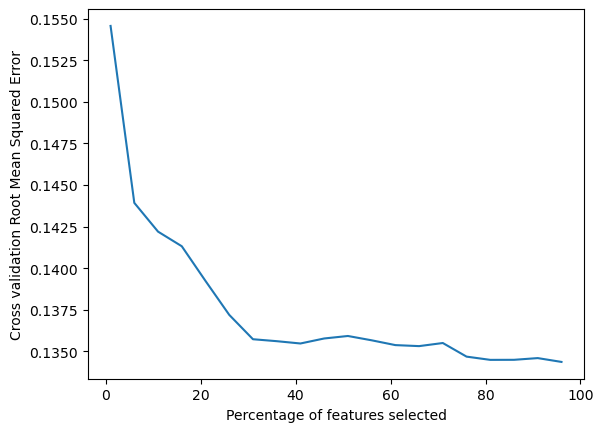

In [24]:
plt.plot(list(percentiles), results)
plt.xlabel("Percentage of features selected")
plt.ylabel("Cross validation Root Mean Squared Error")
plt.show()

In [25]:
print(f"Best (lowest) RMSE on cross-validation: {min(results):.4f}")

Best (lowest) RMSE on cross-validation: 0.1344


In [26]:
optimal_percentile_ind = np.where(results == results.min())[0][0]
print(f"Optimal percentile of features: {percentiles[optimal_percentile_ind]}")
optimal_num_features = int(
    percentiles[optimal_percentile_ind] * len(X_train.columns) / 100
)
print(f"Optimal number of features: {optimal_num_features}")

Optimal percentile of features: 96
Optimal number of features: 93


In [27]:
# displaying corresponding best features
fs_best_features = SelectPercentile(
    f_regression, percentile=percentiles[optimal_percentile_ind]
)
X_train_fs = fs_best_features.fit_transform(X_train, y_train)
X_test_fs = fs_best_features.transform(X_test)

best_features = X_train.columns[fs_best_features.get_support()].values
print(f"The corresponding best features are: {best_features}")

The corresponding best features are: ['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctHisp'
 'agePct12t21' 'agePct12t29' 'agePct16t24' 'agePct65up' 'numbUrban'
 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc'
 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc'
 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap' 'OtherPerCap'
 'HispPerCap' 'NumUnderPov' 'PctPopUnderPov' 'PctLess9thGrade'
 'PctNotHSGrad' 'PctBSorMore' 'PctUnemployed' 'PctEmploy' 'PctEmplManu'
 'PctEmplProfServ' 'MalePctDivorce' 'MalePctNevMarr' 'FemalePctDiv'
 'TotalPctDiv' 'PersPerFam' 'PctFam2Par' 'PctKids2Par' 'PctYoungKids2Par'
 'PctTeen2Par' 'PctWorkMom' 'NumIlleg' 'PctIlleg' 'NumImmig'
 'PctImmigRecent' 'PctImmigRec5' 'PctImmigRec8' 'PctImmigRec10'
 'PctRecentImmig' 'PctRecImmig5' 'PctRecImmig8' 'PctRecImmig10'
 'PctSpeakEnglOnly' 'PctNotSpeakEnglWell' 'PctLargHouseFam'
 'PctLargHouseOccup' 'PersPerOccupHous' 'PersPerOwnOccHous'
 'PersPerRentOccHous' 'PctPersOwnOc

In [28]:
X_train_fs

array([[0.01, 0.54, 0.02, ..., 0.01, 0.2 , 0.47],
       [0.99, 0.42, 0.59, ..., 0.28, 0.55, 0.62],
       [0.01, 0.53, 0.02, ..., 0.11, 0.03, 0.09],
       ...,
       [0.02, 0.48, 0.23, ..., 0.01, 0.47, 0.98],
       [0.01, 0.56, 0.09, ..., 0.02, 0.19, 0.01],
       [0.96, 0.32, 1.  , ..., 0.18, 0.83, 1.  ]], shape=(1595, 93))

In [29]:
X_test_fs

array([[0.  , 0.46, 0.01, ..., 0.04, 0.06, 0.03],
       [0.01, 0.35, 0.01, ..., 0.03, 0.11, 0.01],
       [0.51, 0.31, 0.6 , ..., 0.12, 0.68, 0.75],
       ...,
       [0.06, 0.36, 0.37, ..., 0.03, 0.42, 1.  ],
       [0.01, 0.48, 0.01, ..., 0.02, 0.18, 0.01],
       [0.07, 0.32, 0.99, ..., 0.02, 0.54, 0.71]], shape=(399, 93))

In [30]:
fs_linreg = LinearRegression()
fs_linreg.fit(X_train_fs, y_train)

fs_rsme = measure_performance(X_test_fs, y_test, fs_linreg)
print(f"RMSE with optimal subset of features on test partition: {fs_rsme:.4f}")

RMSE with optimal subset of features on test partition: 0.1438


### Feature Selection Results

- **Optimal Percentile**: 96% (93 out of 97 features)
- **Best Cross-Validation RMSE**: 0.1344
- **Test RMSE**: 0.1438

The analysis reveals that 93 of the 97 features contribute meaningful predictive information. The selected features span demographics, economics, education, family structure, immigration, housing, and geographic characteristics.

**Note**: For production systems, use `Pipeline` to prevent data leakage by re-fitting the feature selector within each CV fold.


## 4. Ridge and Lasso Regression with Regularization

Applying L2 (Ridge) and L1 (Lasso) regularization to prevent overfitting and improve generalization.


In [31]:
def calc_params(X, y, clf, param_values, param_name, K):

    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))

    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print(f"{param_name} = {param_value:.4f}")

        # set classifier parameters
        clf.set_params(**{param_name: param_value})

        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)

        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)

        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = measure_performance(X[train], y[train], clf)
            k_test_scores[j] = measure_performance(X[test], y[test], clf)
            j += 1

        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)

    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label="Train", alpha=0.4, lw=2, c="b")
    plt.plot(param_values, test_scores, label="X-Val", alpha=0.4, lw=2, c="g")
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation RMSE")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [32]:
ridge_range = np.linspace(0.001, 10, 20)
ridge_range

array([1.00000000e-03, 5.27263158e-01, 1.05352632e+00, 1.57978947e+00,
       2.10605263e+00, 2.63231579e+00, 3.15857895e+00, 3.68484211e+00,
       4.21110526e+00, 4.73736842e+00, 5.26363158e+00, 5.78989474e+00,
       6.31615789e+00, 6.84242105e+00, 7.36868421e+00, 7.89494737e+00,
       8.42121053e+00, 8.94747368e+00, 9.47373684e+00, 1.00000000e+01])

alpha = 0.0010
alpha = 0.5273
alpha = 1.0535
alpha = 1.5798
alpha = 2.1061
alpha = 2.6323
alpha = 3.1586
alpha = 3.6848
alpha = 4.2111
alpha = 4.7374
alpha = 5.2636
alpha = 5.7899
alpha = 6.3162
alpha = 6.8424
alpha = 7.3687
alpha = 7.8949
alpha = 8.4212
alpha = 8.9475
alpha = 9.4737
alpha = 10.0000


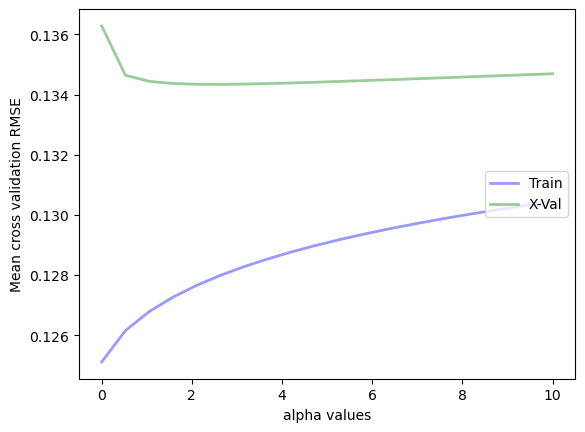

In [33]:
from sklearn.linear_model import Ridge, Lasso

ridge_reg = Ridge()
ridge_train_scores, ridge_test_scores = calc_params(
    X_train, y_train, ridge_reg, ridge_range, "alpha", 5
)

In [34]:
# the best alpha value for Ridge Regression
ridge_best_alpha_idx = np.argmin(ridge_test_scores)
ridge_best_alpha = ridge_range[ridge_best_alpha_idx]
print(
    f"Best alpha for Ridge Regression: {ridge_best_alpha:.4f} with lowest RMSE: {ridge_test_scores[ridge_best_alpha_idx]:.4f}"
)

Best alpha for Ridge Regression: 2.6323 with lowest RMSE: 0.1343


In [35]:
lasso_range = np.linspace(0.0001, 0.01, 20)
lasso_range

array([0.0001    , 0.00062105, 0.00114211, 0.00166316, 0.00218421,
       0.00270526, 0.00322632, 0.00374737, 0.00426842, 0.00478947,
       0.00531053, 0.00583158, 0.00635263, 0.00687368, 0.00739474,
       0.00791579, 0.00843684, 0.00895789, 0.00947895, 0.01      ])

alpha = 0.0001
alpha = 0.0006
alpha = 0.0011
alpha = 0.0017
alpha = 0.0022
alpha = 0.0027
alpha = 0.0032
alpha = 0.0037
alpha = 0.0043
alpha = 0.0048
alpha = 0.0053
alpha = 0.0058
alpha = 0.0064
alpha = 0.0069
alpha = 0.0074
alpha = 0.0079
alpha = 0.0084
alpha = 0.0090
alpha = 0.0095
alpha = 0.0100


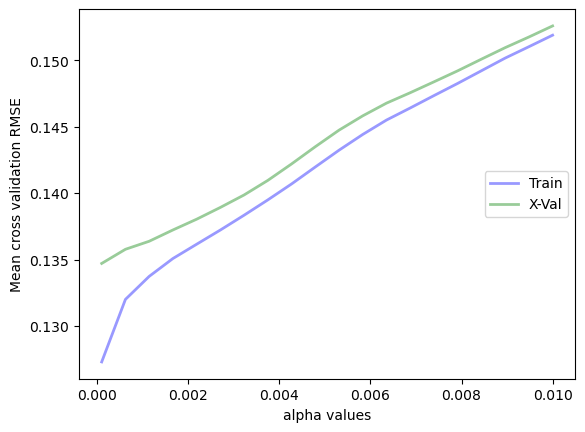

In [36]:
lasso_reg = Lasso()
lasso_train_scores, lasso_test_scores = calc_params(
    X_train, y_train, lasso_reg, lasso_range, "alpha", 5
)

In [37]:
# the best alpha value for Lasso Regression
lasso_best_alpha_idx = np.argmin(lasso_test_scores)
lasso_best_alpha = lasso_range[lasso_best_alpha_idx]
print(
    f"Best alpha for Lasso Regression: {lasso_best_alpha:.4f} with lowest RMSE: {lasso_test_scores[lasso_best_alpha_idx]:.4f}"
)

Best alpha for Lasso Regression: 0.0001 with lowest RMSE: 0.1347


In [38]:
best_ridge_reg = Ridge(alpha=ridge_best_alpha)
best_ridge_reg.fit(X_train, y_train)
ridge_best_rsme = measure_performance(X_test, y_test, best_ridge_reg)
print(
    f"RMSE on test data using alpha: {ridge_best_alpha:.4f} for Ridge Regression is {ridge_best_rsme:.4f}"
)

RMSE on test data using alpha: 2.6323 for Ridge Regression is 0.1440


In [39]:
best_lasso_reg = Lasso(alpha=lasso_best_alpha)
best_lasso_reg.fit(X_train, y_train)
lasso_best_rsme = measure_performance(X_test, y_test, best_lasso_reg)
print(
    f"RMSE on test data using alpha: {lasso_best_alpha:.4f} for Lasso Regression is {lasso_best_rsme:.4f}"
)

RMSE on test data using alpha: 0.0001 for Lasso Regression is 0.1436


### Ridge and Lasso Results

**Ridge Regression (L2 Penalty)**:

- Optimal α: 2.6323
- CV RMSE: 0.1343
- Test RMSE: 0.1440

**Lasso Regression (L1 Penalty)**:

- Optimal α: 0.0001
- CV RMSE: 0.1347
- Test RMSE: 0.1436 ✓ Best performance

### Bias-Variance Tradeoff Observations

The plots clearly demonstrate the bias-variance tradeoff:

- **Low α (weak regularization)**: Low training RMSE but higher CV RMSE → overfitting (high variance)
- **Optimal α**: Minimal gap between training and CV RMSE → best generalization
- **High α (strong regularization)**: Both errors increase → underfitting (high bias)

Lasso's superior performance (0.1436) suggests L1's implicit feature selection benefits this dataset by zeroing out less informative coefficients.


## 5. Stochastic Gradient Descent with Elastic Net

Exploring SGDRegressor with L1, L2, and elastic net penalties for scalable regression on standardized features.


In [40]:
from sklearn.preprocessing import StandardScaler

# scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

sgd_reg = SGDRegressor()

parameters = {"penalty": ["l1", "l2"], "alpha": np.linspace(0.0001, 10, 20)}

grid_search = GridSearchCV(sgd_reg, parameters, verbose=1, cv=5)

In [42]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


,estimator,SGDRegressor()
,param_grid,"{'alpha': array([1.0000...00000000e+01]), 'penalty': ['l1', 'l2']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [119]:
grid_search.best_params_
gs_best_alpha = grid_search.best_params_["alpha"]
gs_best_penalty = grid_search.best_params_["penalty"]
print(f"The best alpha value is {gs_best_alpha}")
print(f"The best penalty value is {gs_best_penalty}")

The best alpha value is 0.0001
The best penalty value is l1


In [ ]:
best_sgd_reg = SGDRegressor(alpha=gs_best_alpha, penalty=gs_best_penalty)
best_sgd_reg.fit(X_train_scaled, y_train)

best_sgd_reg_rsme_train = measure_performance(X_train_scaled, y_train, best_sgd_reg)
best_sgd_reg_rsme_test = measure_performance(X_test_scaled, y_test, best_sgd_reg)

print(
    f"Train RMSE score for train data using SGDRegessor is {best_sgd_reg_rsme_train:.4f}"
)
print(
    f"Test RMSE score for test data using SGDRegessor is {best_sgd_reg_rsme_test:.4f}"
)

Train RMSE score for train data using SGDRegessor is 0.1301
Test RMSE score for test data using SGDRegessor is 0.1456


In [121]:
l1_ratio_range = np.linspace(0, 1, 21)
l1_ratio_range

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

l1_ratio = 0.0000
l1_ratio = 0.0500
l1_ratio = 0.1000
l1_ratio = 0.1500
l1_ratio = 0.2000
l1_ratio = 0.2500
l1_ratio = 0.3000
l1_ratio = 0.3500
l1_ratio = 0.4000
l1_ratio = 0.4500
l1_ratio = 0.5000
l1_ratio = 0.5500
l1_ratio = 0.6000
l1_ratio = 0.6500
l1_ratio = 0.7000
l1_ratio = 0.7500
l1_ratio = 0.8000
l1_ratio = 0.8500
l1_ratio = 0.9000
l1_ratio = 0.9500
l1_ratio = 1.0000


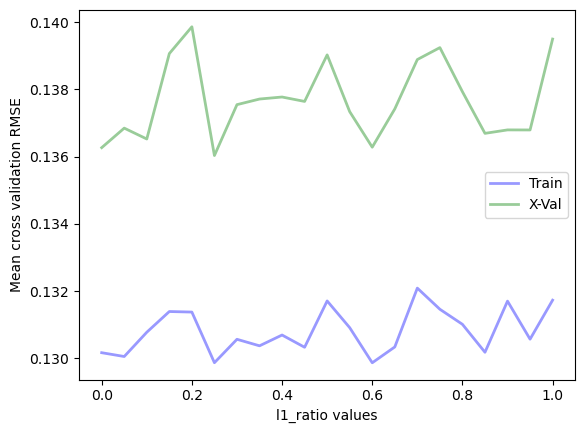

In [ ]:
elasticnet_sgd_reg = SGDRegressor(penalty="elasticnet")

sgd_reg_train_scores, sgd_reg_test_scores = calc_params(
    X_train_scaled, y_train, elasticnet_sgd_reg, l1_ratio_range, "l1_ratio", 5
)

In [ ]:
# the best l1_ratio value for SGDRegressor
elasticnet_best_l1ratio_idx = np.argmin(sgd_reg_test_scores)
elasticnet_best_l1ratio = l1_ratio_range[elasticnet_best_l1ratio_idx]
print(
    f"Best l1_ratio for SGDRegressor: {elasticnet_best_l1ratio:.4f} with lowest RMSE: {sgd_reg_test_scores[elasticnet_best_l1ratio_idx]:.4f}"
)

Best l1_ratio for SGDRegressor: 0.2500 with lowest RMSE: 0.1360


In [ ]:
best_elasticnet_sgd_reg = SGDRegressor(
    penalty="elasticnet", l1_ratio=elasticnet_best_l1ratio
)
best_elasticnet_sgd_reg.fit(X_train_scaled, y_train)

elasticnet_best_rsme_train = measure_performance(
    X_train_scaled, y_train, best_elasticnet_sgd_reg
)
elasticnet_best_rsme_test = measure_performance(
    X_test_scaled, y_test, best_elasticnet_sgd_reg
)

print(
    f"RMSE on training data using l1_ratio: {elasticnet_best_l1ratio:.4f} for SGDRegressor using ElasticNet is {elasticnet_best_rsme_train:.4f}"
)
print(
    f"RMSE on test data using l1_ratio: {elasticnet_best_l1ratio:.4f} for SGDRegressor using ElasticNet is {elasticnet_best_rsme_test:.4f}"
)

RMSE on training data using l1_ratio: 0.2500 for SGDRegressor using ElasticNet is 0.1314
RMSE on test data using l1_ratio: 0.2500 for SGDRegressor using ElasticNet is 0.1471


### SGD Regression Results

**Grid Search (L1 vs L2)**:

- Best penalty: L1
- Best α: 0.0001
- Train RMSE: 0.1301
- Test RMSE: 0.1456

**Elastic Net Optimization**:

- Optimal l1_ratio: 0.25 (25% L1, 75% L2)
- CV RMSE: 0.1360
- Train RMSE: 0.1314
- Test RMSE: 0.1471

### Comprehensive Model Comparison

| Model                           | Test RMSE    |
| ------------------------------- | ------------ |
| **Lasso (α=0.0001)**            | **0.1436** ✓ |
| Feature Selection (96%)         | 0.1438       |
| Ridge (α=2.6323)                | 0.1440       |
| SGD L1 (α=0.0001)               | 0.1456       |
| SGD Elastic Net (l1_ratio=0.25) | 0.1471       |

### Key Insights

1. **Lasso achieves best test performance** through implicit feature selection
2. **Pure penalties outperform elastic net** for this dataset
3. **SGD performs competitively** with slightly higher variance due to stochastic optimization
4. **All regularized models generalize well** with consistent train-test gaps
5. **Feature standardization is critical** for SGDRegressor convergence
